In [2]:
pip install pandas

In [3]:
pip install opendatasets

In [10]:
import pandas as pd
import opendatasets as od
import os
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image, display
import seaborn as sns

In [6]:
current_directory = '/content/drive/MyDrive/Colab Notebooks/elta'

In [6]:
od.download("https://www.kaggle.com/competitions/titanic/data",
            data_dir=current_directory, force=True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: davidedry
Your Kaggle Key: ··········


100%|██████████| 34.1k/34.1k [00:00<00:00, 3.01MB/s]


Extracting archive /content/drive/MyDrive/Colab Notebooks/elta/titanic/titanic.zip to /content/drive/MyDrive/Colab Notebooks/elta/titanic


In [22]:
train = pd.read_csv(current_directory + '/titanic/train.csv')
test = pd.read_csv(current_directory + '/titanic/test.csv')
display(train.head(5))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
# train = train.set_index('PassengerId')
train = train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [28]:
train.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [29]:
print(train.shape)
missing_values_count = train.isnull().sum()
print(missing_values_count)

(891, 8)
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


In [31]:
train['Age'].fillna(train['Age'].median(), inplace=True)
train = train.dropna()
missing_values_count = train.isnull().sum()
print(train.shape)
print(missing_values_count)

(889, 8)
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


/tmp/ipython-input-316368710.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)


In [33]:
unique_count = train.nunique()
print(unique_count)

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        247
Embarked      3
dtype: int64


<Axes: xlabel='Age', ylabel='Count'>

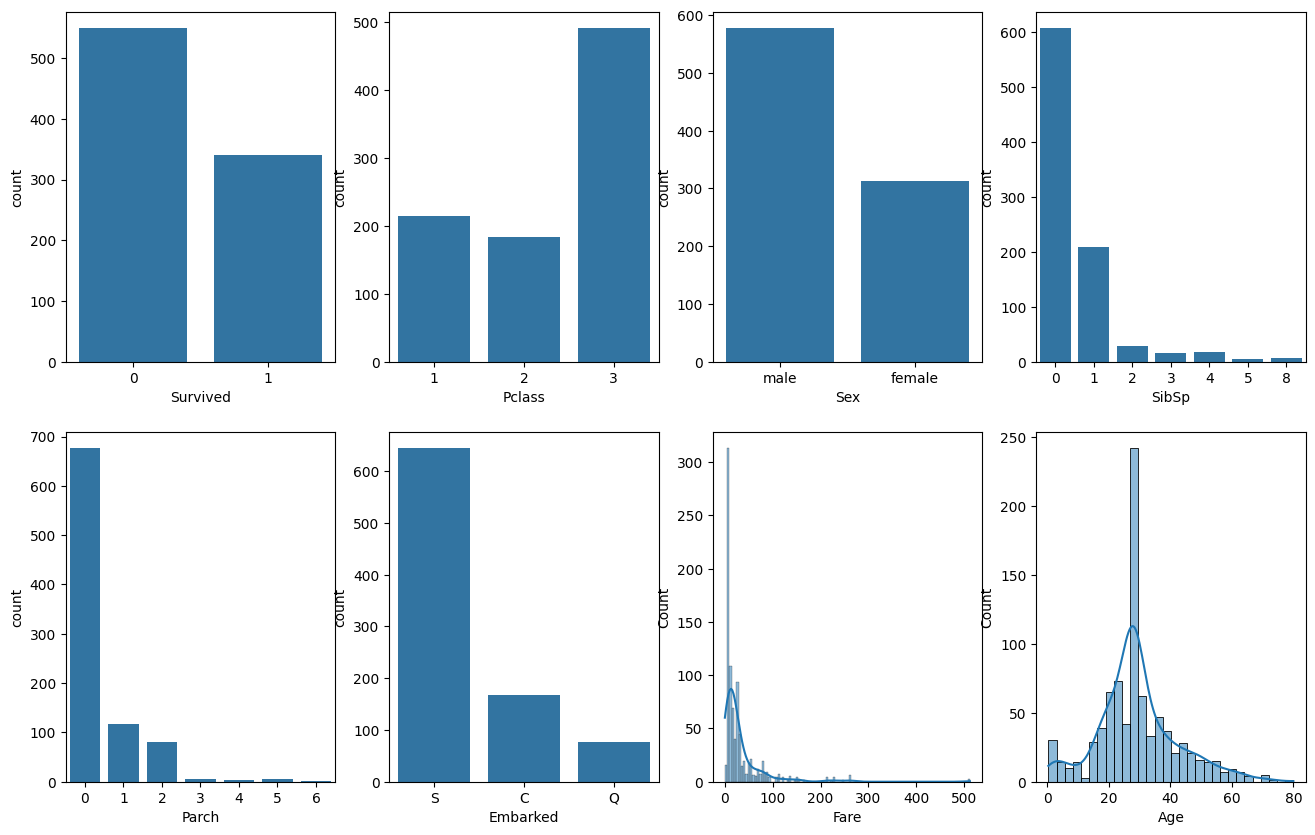

In [44]:
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
sns.countplot(data=train, x= 'Survived',ax=axes[0,0])
sns.countplot(data=train, x = 'Pclass', ax=axes[0,1])
sns.countplot(data=train, x = 'Sex', ax=axes[0,2])
sns.countplot(data=train, x = 'SibSp', ax=axes[0,3])
sns.countplot(data=train, x = 'Parch', ax=axes[1,0])
sns.countplot(data=train, x = 'Embarked', ax=axes[1,1])
sns.histplot(train['Fare'], kde=True,ax=axes[1,2])
sns.histplot(train['Age'].dropna(),kde=True,ax=axes[1,3])

<Axes: xlabel='Survived', ylabel='Fare'>

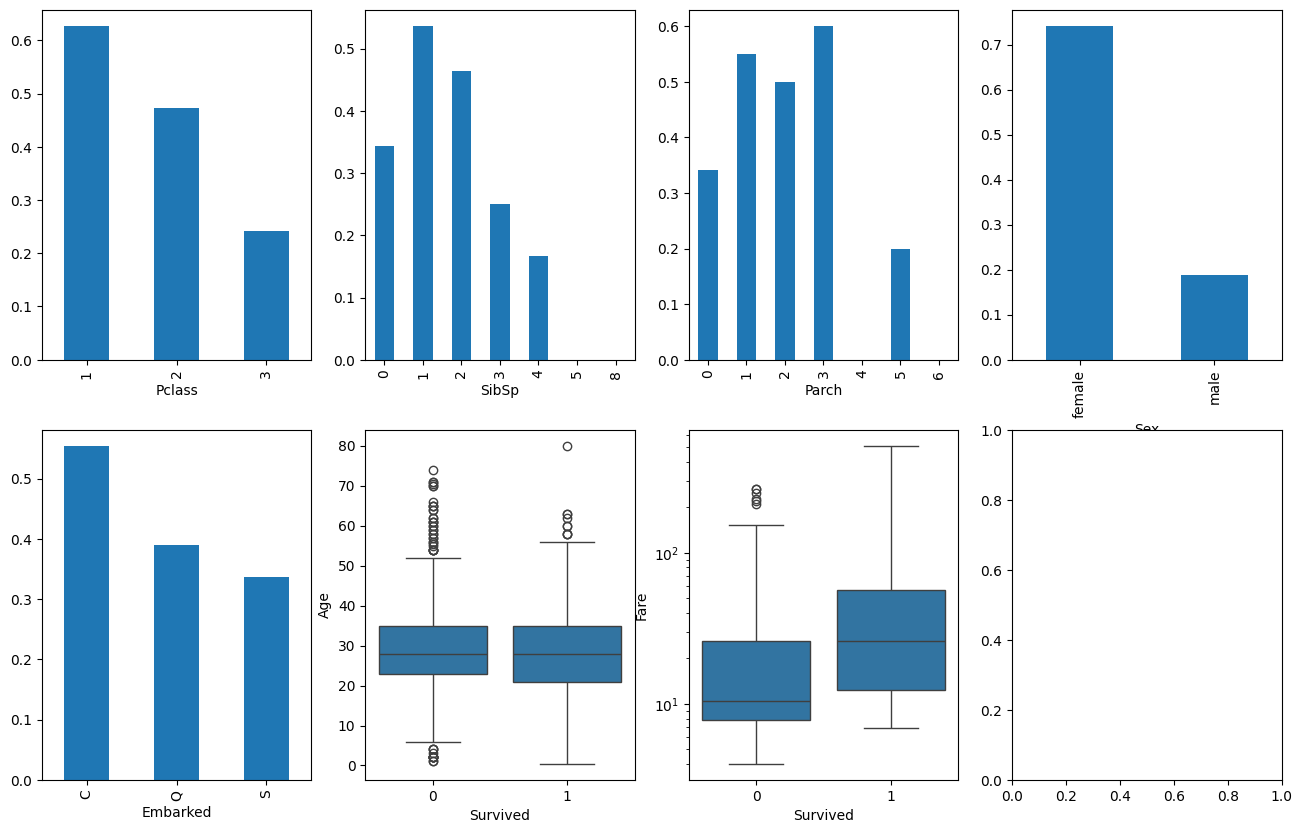

In [49]:
figbi, axesbi = plt.subplots(2, 4, figsize=(16, 10))
train.groupby('Pclass')['Survived'].mean().plot(kind='bar',ax=axesbi[0,0],xlim=[0,1])
train.groupby('SibSp')['Survived'].mean().plot(kind='bar',ax=axesbi[0,1],xlim=[0,1])
train.groupby('Parch')['Survived'].mean().plot(kind='bar',ax=axesbi[0,2],xlim=[0,1])
train.groupby('Sex')['Survived'].mean().plot(kind='bar',ax=axesbi[0,3],xlim=[0,1])
train.groupby('Embarked')['Survived'].mean().plot(kind='bar',ax=axesbi[1,0],xlim=[0,1])
sns.boxplot(x="Survived", y="Age", data=train,ax=axesbi[1,1])
sns.boxplot(x="Survived", y="Fare", data=train,ax=axesbi[1,2], log_scale=True)